<a href="https://colab.research.google.com/github/sakshiigdtuw/AWS-ML-Project/blob/main/AWS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Data Collection & processing

Dataset [Air pollution data of india 2020-2023](https://www.kaggle.com/datasets/seshupavan/air-pollution-data-of-india-2020-2023)

In [61]:
data = pd.read_csv('/content/air_pollution_data.csv')

In [62]:
data.head() #print top 5 rows of dataset

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [63]:
data.tail() #last 5 rows

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
23499,Visakhapatnam,21-05-2023,3,353.81,0.0,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.0,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.0,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.0,1.36,95.84,2.21,30.17,48.89,0.00
23503,Visakhapatnam,25-05-2023,4,427.25,0.0,6.00,88.69,10.73,52.36,61.41,0.20


In [64]:
data.shape

(23504, 11)

In [65]:
# check missing value
data.isnull().sum()


,0
city,0
date,0
aqi,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


Data Analysis**(EDA)**

In [67]:
import plotly.express as px

fig = px.scatter(data,x='pm2_5',y='aqi')
fig.show()

In [68]:
fig_no2 = px.scatter(data,x='no2',y='aqi')
fig_no2.show()

In [69]:
fig_so2 = px.scatter(data,x='so2',y='aqi')
fig_so2.show()

In [70]:
fig_co = px.scatter(data,x='co',y='aqi')
fig_co.show()

Forecasting Model:**FB Prophet Algorihtm**

Regression Model

**Regression model**




In [84]:
x = data.iloc[:,3:11].values
y = data.iloc[:,2].values

In [85]:
x

array([[5.20710e+02, 2.38000e+00, 1.62800e+01, ..., 6.59600e+01,
        7.21300e+01, 8.36000e+00],
       [1.68228e+03, 7.71000e+00, 5.48400e+01, ..., 1.20950e+02,
        1.54530e+02, 2.73600e+01],
       [1.81580e+03, 1.65400e+01, 4.93500e+01, ..., 1.33470e+02,
        1.72630e+02, 2.81200e+01],
       ...,
       [3.90530e+02, 0.00000e+00, 4.28000e+00, ..., 3.60100e+01,
        4.80600e+01, 1.20000e+00],
       [3.00410e+02, 0.00000e+00, 1.36000e+00, ..., 3.01700e+01,
        4.88900e+01, 0.00000e+00],
       [4.27250e+02, 0.00000e+00, 6.00000e+00, ..., 5.23600e+01,
        6.14100e+01, 2.00000e-01]])

In [86]:
y

array([5, 5, 5, ..., 3, 3, 4])

In [123]:
# splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [124]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [125]:
y_pred = linear_reg.predict(x_test)

In [126]:
# point wh x = 0 and line touches the y axis
linear_reg.intercept_

2.829685474358201

In [127]:
linear_reg.coef_


array([-6.12595265e-04, -9.50013184e-04,  2.35097261e-02,  9.58828440e-03,
       -1.34758139e-03, -2.47289746e-05,  6.32574066e-03,  8.30501232e-03])

coefficent represents the direct relationsip wiht the aqi.
1 unit change in co will dec the aqi by - 0.000613 = -0.06%

In [128]:
coef_data = pd.DataFrame(data=linear_reg.coef_,index=data.columns[3:11],columns=['coefficient'])
coef_data

,coefficient
co,-0.000613
no,-0.000950
no2,0.023510
o3,0.009588
so2,-0.001348
pm2_5,-0.000025
pm10,0.006326
nh3,0.008305


Text(0, 0.5, 'Predicted')

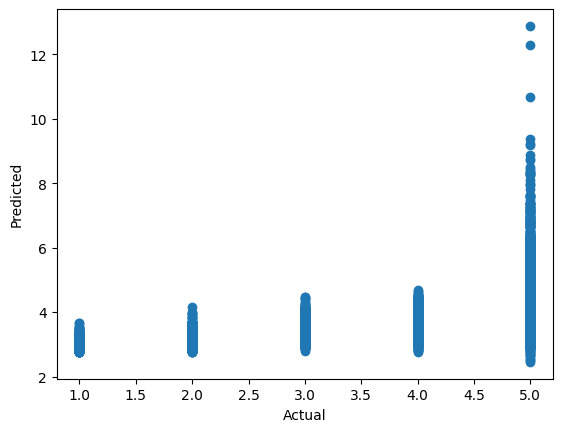

In [130]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: ylabel='Density'>

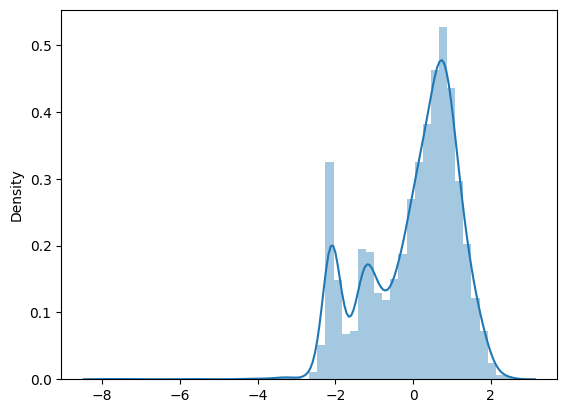

In [131]:
sns.distplot((y_test-y_pred),bins=50)
# peak show the error in our model to predict y values.

In [132]:
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score
print(f"MAE: {mae(y_test,y_pred)}")
print(f"MSE: {mse(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")
# r2 score signifies that 0.34 % of aqi is being effected by the factors listed above

MAE: 0.9464309389303526
MSE: 1.309747799747344
R2: 0.34608960826136337


In [71]:
# converting the date from DD-MM-YYYY to YYYY-MM-DD

date_info = pd.to_datetime(data['date'])
date_info

,date
0,2020-11-30
1,2020-12-01
2,2020-12-02
3,2020-12-03
4,2020-12-04
...,...
23499,2023-05-21
23500,2023-05-22
23501,2023-05-23
23502,2023-05-24


In [72]:
print(type(date_info))

<class 'pandas.core.series.Series'>


In [73]:
df = pd.DataFrame()

In [74]:
df['ds'] = pd.to_datetime(data['date'])
df['y'] = data['aqi']

In [75]:
df.head()

,ds,y
0,2020-11-30,5
1,2020-12-01,5
2,2020-12-02,5
3,2020-12-03,5
4,2020-12-04,5


In [76]:
# Training prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fmtd6w6/vi3j2_4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fmtd6w6/i6n0uchj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23214', 'data', 'file=/tmp/tmp4fmtd6w6/vi3j2_4i.json', 'init=/tmp/tmp4fmtd6w6/i6n0uchj.json', 'output', 'file=/tmp/tmp4fmtd6w6/prophet_model3r9zldtv/prophet_model-20241127140842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [77]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1264,2024-05-20
1265,2024-05-21
1266,2024-05-22
1267,2024-05-23
1268,2024-05-24


In [78]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1264,2024-05-20,2.199112,0.754793,3.815177
1265,2024-05-21,2.307362,0.723478,3.887411
1266,2024-05-22,2.289880,0.731917,3.770629
1267,2024-05-23,2.312448,0.683962,3.778061
1268,2024-05-24,2.295154,0.695105,3.820414


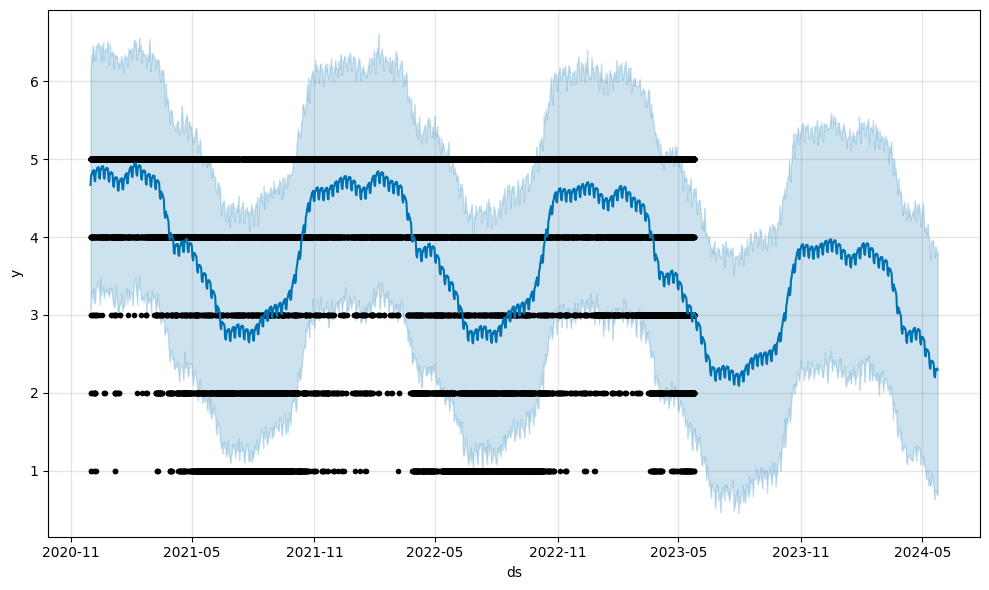

In [79]:
fig1 = model.plot(forecast)

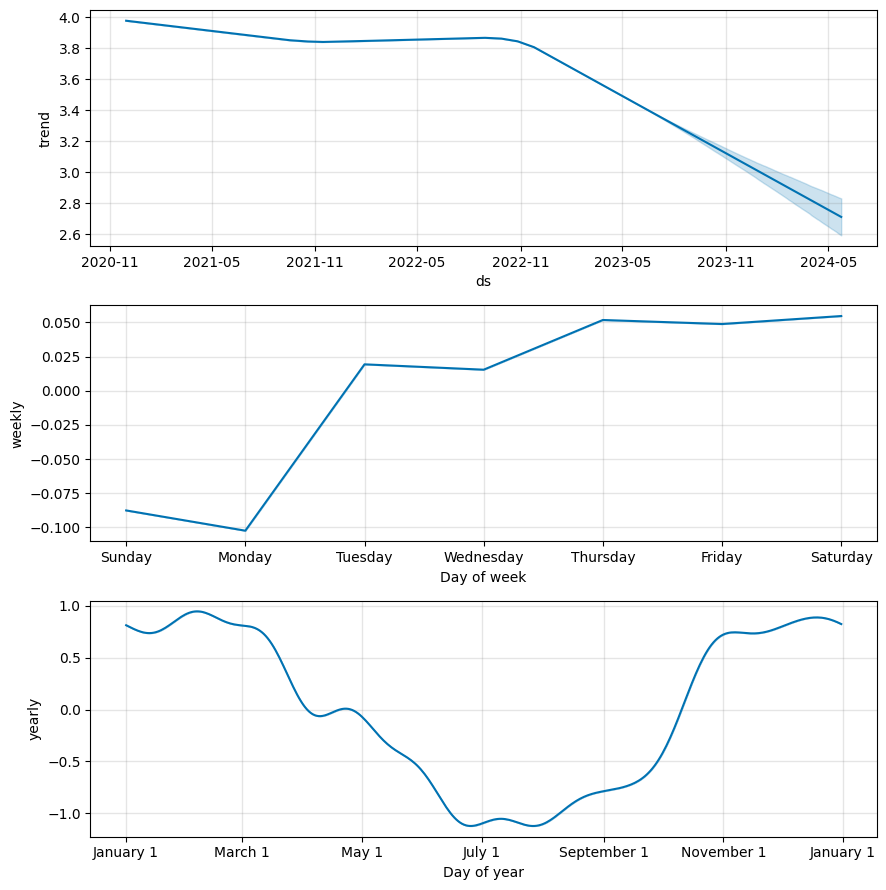

In [80]:
fig2 = model.plot_components(forecast)



In [81]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [82]:
plot_components_plotly(model, forecast)